<a href="https://colab.research.google.com/github/rakeshgovindsuresh/Python-Practice/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/50
233/233 [==============================] - 2s 5ms/step - loss: 0.0073 - val_loss: 0.0047
Epoch 2/50
233/233 [==============================] - 1s 4ms/step - loss: 0.0048 - val_loss: 0.0045
Epoch 3/50
233/233 [==============================] - 1s 4ms/step - loss: 0.0044 - val_loss: 0.0041
Epoch 4/50
233/233 [==============================] - 1s 4ms/step - loss: 0.0045 - val_loss: 0.0046
Epoch 5/50
233/233 [==============================] - 1s 4ms/step - loss: 0.0044 - val_loss: 0.0042
Epoch 6/50
233/233 [==============================] - 1s 4ms/step - loss: 0.0044 - val_loss: 0.0040
Epoch 7/50
233/233 [==============================] - 1s 4ms/step - loss: 0.0043 - val_loss: 0.0041
Epoch 8/50
233/233 [==============================] - 1s 4ms/step - loss: 0.0044 - val_loss: 0.0041
Epoch 9/50
233/233 [==============================] - 1s 4ms/step - loss: 0.0043 - val_loss: 0.0041
Epoch 10/50
233/233 [==============================] - 1s 3ms/step - loss: 0.0043 - val_loss: 0.0045

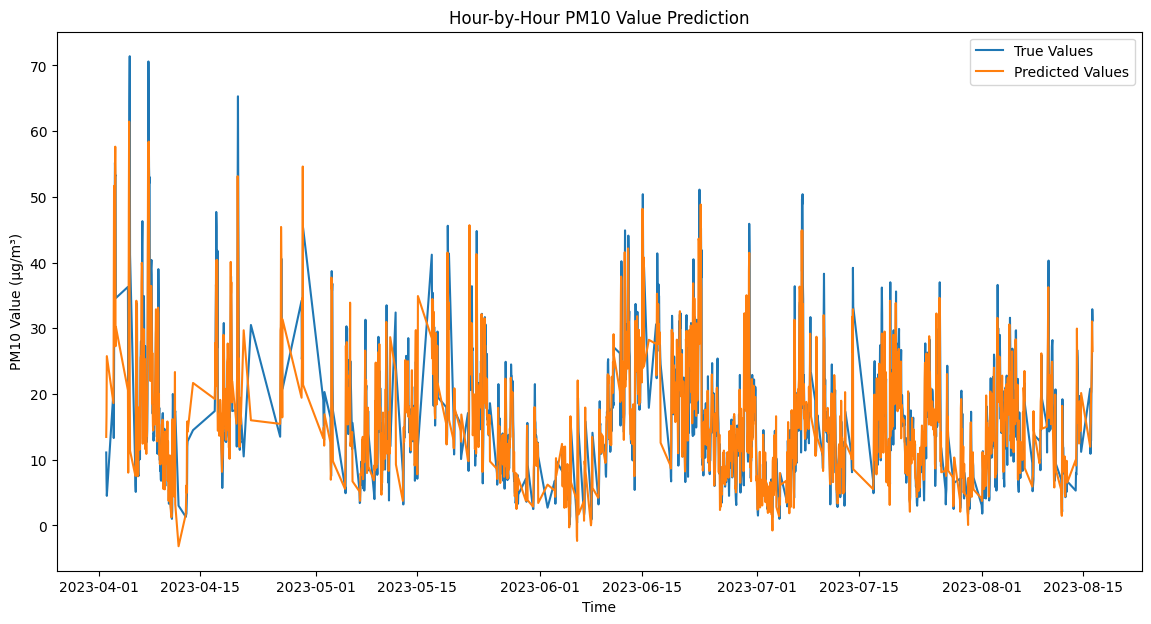

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten

# Load the data
file_path = '/content/Airquality_sutton (1).csv'  # Update this path to your actual file location
data = pd.read_csv(file_path)

# Convert date_local to datetime
data['date_utc'] = pd.to_datetime(data['date_utc'])

# Set date_local as index
data.set_index('date_utc', inplace=True)

# Ensure the index is in datetime format
if not isinstance(data.index, pd.DatetimeIndex):
    data.index = pd.to_datetime(data.index)

# Check for missing values and interpolate if necessary
data['value'].interpolate(method='time', inplace=True)

# Normalize data
scaler = MinMaxScaler()
data['value'] = scaler.fit_transform(data['value'].values.reshape(-1, 1))

# Create sequences
def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length]
        target = data[i + seq_length]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

seq_length = 24
X, y = create_sequences(data['value'], seq_length)

# Reshape data for CNN input
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split into training and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(seq_length, 1)))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform predictions and true values
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Get the corresponding datetime index for the test set
test_dates = data.index[-len(y_test_inv):]

# Evaluate the model
mae = mean_absolute_error(y_test_inv, y_pred_inv)
print(f'Mean Absolute Error: {mae}')

# Plot results
plt.figure(figsize=(14, 7))
plt.plot(test_dates, y_test_inv, label='True Values')
plt.plot(test_dates, y_pred_inv, label='Predicted Values')
plt.title('Hour-by-Hour PM10 Value Prediction')
plt.xlabel('Time')
plt.ylabel('PM10 Value (µg/m³)')
plt.legend()
plt.show()


In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
print(f'Mean Absolute Error (MAE): {mae}')

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_test_inv, y_pred_inv)
print(f'Mean Squared Error (MSE): {mse}')

# Compute Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Compute Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape}')

# Compute R-squared (R²) Score
r2 = r2_score(y_test_inv, y_pred_inv)
print(f'R-squared (R²) Score: {r2}')


Mean Absolute Error (MAE): 4.363757781136409
Mean Squared Error (MSE): 38.25775678346734
Root Mean Squared Error (RMSE): 6.185285505412612
Mean Absolute Percentage Error (MAPE): 36.62897456877265
R-squared (R²) Score: 0.6024576015338996
